- read datasets, potentially using sql query if it doesn't take long
- do my own basic explorations, compare to Hauke's
- Visualize labels
- IoU

In [53]:
# Imports
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read dataset

In [29]:
### Functions from https://github.com/zooniverse/Data-digging/blob/master/example_scripts/astronomy_rewind/workflow1to2.py

def JSONParser(data):
    """call json.loads"""
    return json.loads(data)


def load_classifications(filename, json_columns=None):
    """
    Load classifications into pandas dataframe.
    Some columns of the csv are embedded json and need special parsing.
    """
    json_columns = json_columns or ['metadata', 'annotations', 'subject_data']
    converters = {i: JSONParser for i in json_columns}

    return pd.read_csv(filename, converters=converters)

def unpack(series):
    """
    Return the first value in a series.
    All annotations values are lists because of a few multiple tasks.
    The second multiple task always has the value of 'None of the above'
    (For this dataset!)
    """
    return [a[0] for a in series]


def parse_classifications(filename,**kwarg):
    """
    Load classifications and datamunge annotations column.
    """
    data = load_classifications(filename,**kwarg)

    # Only need the first item in the annotations list of json objects
    data['annotations'] = unpack(data['annotations'])
    return data

In [6]:
clas_fn = '../zooniverse_raw/sugar-flower-fish-or-gravel-classifications_18_11_02.csv'
subj_fn = '../zooniverse_raw/sugar-flower-fish-or-gravel-subjects_18_11_05.csv'

In [113]:
clas = parse_classifications(clas_fn,json_columns=['metadata', 'annotations', 'subject_data'])
subj = load_classifications(subj_fn); subj.head()

,subject_id,project_id,workflow_id,subject_set_id,metadata,locations,classifications_count,retired_at,retirement_reason,created_at,updated_at
0,26976345,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:28 UTC,2018-10-24 16:42:28 UTC
1,26976346,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:29 UTC,2018-10-24 16:42:29 UTC
2,26976347,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:31 UTC,2018-10-24 16:42:31 UTC
3,26976348,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:32 UTC,2018-10-24 16:42:32 UTC
4,26976349,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:33 UTC,2018-10-24 16:42:33 UTC


In [126]:
subj

,subject_id,project_id,workflow_id,subject_set_id,metadata,locations,classifications_count,retired_at,retirement_reason,created_at,updated_at
0,26976345,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:28 UTC,2018-10-24 16:42:28 UTC
1,26976346,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:29 UTC,2018-10-24 16:42:29 UTC
2,26976347,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:31 UTC,2018-10-24 16:42:31 UTC
3,26976348,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:32 UTC,2018-10-24 16:42:32 UTC
4,26976349,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:33 UTC,2018-10-24 16:42:33 UTC
5,26976350,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:35 UTC,2018-10-24 16:42:35 UTC
6,26976351,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:36 UTC,2018-10-24 16:42:36 UTC
7,26976352,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:38 UTC,2018-10-24 16:42:38 UTC
8,26976353,7699,NaN,60713,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:42:39 UTC,2018-10-24 16:42:39 UTC
9,26976354,7699,NaN,60721,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-24 16:44:58 UTC,2018-10-24 16:44:58 UTC


In [125]:
subj.tail()

,subject_id,project_id,workflow_id,subject_set_id,metadata,locations,classifications_count,retired_at,retirement_reason,created_at,updated_at
10124,27164038,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",2,NaN,NaN,2018-10-29 12:15:26 UTC,2018-10-29 12:15:26 UTC
10125,27164039,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",3,NaN,NaN,2018-10-29 12:15:27 UTC,2018-10-29 12:15:27 UTC
10126,27164040,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-29 12:15:28 UTC,2018-10-29 12:15:28 UTC
10127,27164041,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",0,NaN,NaN,2018-10-29 12:15:31 UTC,2018-10-29 12:15:31 UTC
10128,27164042,7699,8073.0,60835,{'fn': '/project/meteo/work/S.Rasp/cloud-class...,"{""0"":""https://panoptes-uploads.zooniverse.org/...",1,NaN,NaN,2018-10-29 12:15:33 UTC,2018-10-29 12:15:33 UTC


In [121]:
subj['metadata'][0]['fn']

'/project/meteo/work/S.Rasp/cloud-classification/examples/flower/Aqua_CorrectedReflectance20090122_-61--40_10-24.jpeg'

In [129]:
subjects_name = {60811:'BCO_DJF_Aqua',60812:'BCO_DJF_Terra',60813: 'BCO_MAM_Aqua',\
                 60814: 'BCO_MAM_Terra',60815:'R2_DJF_Aqua',60816:'R2_DJF_Terra',\
                 60817:'R3_DJF_Aqua', 60818:'R3_DJF_Terra',60819:'R3_SON_Aqua',\
                 60835: 'R3_SON_Terra'}

In [133]:
subj2fn = {}
for i, r in subj.iterrows():
    if r['subject_set_id'] in list(subjects_name.keys()):
        subj2fn[r['subject_id']] =  r['metadata']['fn']

In [135]:
len(subj2fn)

9984

In [90]:
len(clas)

20211

In [38]:
clas.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,128465431,raspstephan,1814911.0,b454def8ef12f0860686,8072,Practice,19.13,2018-10-24 17:02:45 UTC,NaN,NaN,"{'source': 'api', 'session': '88559898111399b0...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976393': {'retired': None, 'fn': '/project...",26976393
1,128490303,not-logged-in-b454def8ef12f0860686,NaN,b454def8ef12f0860686,8072,Practice,24.13,2018-10-24 18:57:11 UTC,NaN,NaN,"{'source': 'api', 'session': '87cebe5a5f8df494...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26977308': {'retired': None, 'fn': '/project...",26977308
2,128623366,ShCu,1830047.0,262955a3374c33958643,8072,Practice,24.13,2018-10-25 16:49:06 UTC,NaN,NaN,"{'source': 'api', 'session': '827957f6188eba83...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976669': {'retired': None, 'fn': '/project...",26976669
3,128623455,ShCu,1830047.0,262955a3374c33958643,8072,Practice,24.13,2018-10-25 16:49:36 UTC,NaN,NaN,"{'source': 'api', 'session': '827957f6188eba83...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976422': {'retired': None, 'fn': '/project...",26976422
4,128623533,ShCu,1830047.0,262955a3374c33958643,8072,Practice,24.13,2018-10-25 16:50:08 UTC,NaN,NaN,"{'source': 'api', 'session': '827957f6188eba83...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26977225': {'retired': None, 'fn': '/project...",26977225


In [86]:
clas.tail()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,num_boxes
20206,129755508,magio,1830051.0,8c99af1e1ae0f6006a1f,8073,Full dataset,13.11,2018-11-02 15:15:23 UTC,NaN,NaN,"{'source': 'api', 'session': '2572c8d4566709b1...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27141271': {'retired': None, 'fn': '/project...",27141271,1
20207,129755509,magio,1830051.0,8c99af1e1ae0f6006a1f,8073,Full dataset,13.11,2018-11-02 15:15:23 UTC,NaN,NaN,"{'source': 'api', 'session': '2572c8d4566709b1...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27163085': {'retired': None, 'fn': '/project...",27163085,2
20208,129755510,magio,1830051.0,8c99af1e1ae0f6006a1f,8073,Full dataset,13.11,2018-11-02 15:15:23 UTC,NaN,NaN,"{'source': 'api', 'session': '2572c8d4566709b1...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27141021': {'retired': None, 'fn': '/project...",27141021,0
20209,129755525,lutz.hirsch,1837010.0,28e5711907d54bd94f66,8073,Full dataset,13.11,2018-11-02 15:15:30 UTC,NaN,NaN,"{'source': 'api', 'session': '655b7869b9f4cdbf...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27148023': {'retired': {'id': 24677542, 'wor...",27148023,1
20210,129755532,jkiliani,1837012.0,0487d4d9788931868f3a,8073,Full dataset,13.11,2018-11-02 15:15:34 UTC,NaN,NaN,"{'source': 'api', 'session': '7ba4639dcd776442...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27147809': {'retired': None, 'fn': '/project...",27147809,2


In [92]:
prac = clas[clas['workflow_name'] == 'Practice']

In [94]:
len(prac)

2133

In [114]:
clas['num_boxes'] = clas['annotations'].apply(lambda x: len(x['value']))

In [51]:
clas['num_boxes'].describe()

count    20211.000000
mean         1.460987
std          1.125038
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: num_boxes, dtype: float64

In [70]:
clas['num_boxes'].sum()

29528

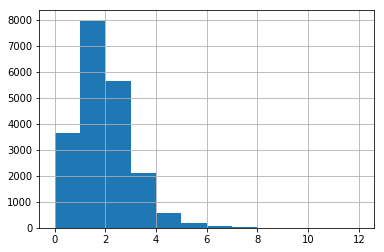

In [55]:
clas['num_boxes'].hist(bins=np.arange(13))

In [57]:
clas['user_name'].unique(), clas['user_name'].unique().shape

(array(['raspstephan', 'not-logged-in-b454def8ef12f0860686', 'ShCu',
        'bjorn.stevens', 'not-logged-in-6721fe35742a208c7ea5', 'lpaccini',
        'lkluft', 'DelaS', 'friedhelmjansen', 'Uthlande', 'jkiliani',
        'ReinhardB', 'JuleR', 'majomi', 'MarcusKlingebiel', 'dleutwyler',
        'biancorosa', 'TobiasBecker', 'bschul', 'Julia.Windmiller',
        'lutz.hirsch', 'Serikov', 'geetgeorge', 'jvmpi', 'cathyhohenegger',
        'not-logged-in-194b3b61c9c070c60365', 'jan.welss', 'heikekonow',
        'anna.luebke', 'onnoq', 'kfodor',
        'not-logged-in-acafbd8be3e0c307f3bf', 'christopher.moseley',
        'magio', 'not-logged-in-339a2150200b8eab9fb6', 'Saybot',
        'hartmut.borth', 'monika.esch', 'Armin.haghshenas',
        'not-logged-in-169bca65941805c9a058', 'elessar.telkontar',
        'Wolkengebilde', 'CStephan', 'traute.crueger', 'tmieslinger',
        'guidocioni', 'CKauhs', 'akio', 'bko_cloud', 'LWMPI', 'jpmellado',
        'stefankinne', 'bkirsch', 'double_p', '

In [59]:
clas['user_name'].value_counts()

jan.welss                             1053
guidocioni                             928
LWMPI                                  858
Serikov                                739
dleutwyler                             705
lpaccini                               592
hartmut.borth                          580
CStephan                               560
majomi                                 549
Uthlande                               530
bschul                                 529
lutz.hirsch                            522
Armin.haghshenas                       512
JuleR                                  505
cathyhohenegger                        475
monika.esch                            467
jkiliani                               459
bko_cloud                              458
magio                                  456
TobiasBecker                           456
Saybot                                 449
jpmellado                              430
onnoq                                  430
traute.crue

In [95]:
prac['user_name'].value_counts()

not-logged-in-339a2150200b8eab9fb6    87
ReinhardB                             83
not-logged-in-acafbd8be3e0c307f3bf    62
DelaS                                 59
Uthlande                              57
hartmut.borth                         57
monika.esch                           56
cathyhohenegger                       56
bschul                                56
majomi                                56
traute.crueger                        55
lpaccini                              55
TobiasBecker                          54
stefankinne                           54
Armin.haghshenas                      54
LWMPI                                 53
lkluft                                53
christopher.moseley                   53
heikekonow                            53
dleutwyler                            53
biancorosa                            52
anna.luebke                           52
Saybot                                52
guidocioni                            52
jan.welss       

## Basic exploration

### Distribution of labels

In [83]:
labels = pd.Series([l['tool_label'] for a in clas['annotations'] for l in a['value'] ])

In [84]:
len(labels)

29528

In [85]:
labels.value_counts()

Sugar     10816
Gravel     7439
Fish       6015
Flower     5258
dtype: int64

## Visualize labels

In [137]:
clas.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,num_boxes
0,128465431,raspstephan,1814911.0,b454def8ef12f0860686,8072,Practice,19.13,2018-10-24 17:02:45 UTC,NaN,NaN,"{'source': 'api', 'session': '88559898111399b0...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976393': {'retired': None, 'fn': '/project...",26976393,1
1,128490303,not-logged-in-b454def8ef12f0860686,NaN,b454def8ef12f0860686,8072,Practice,24.13,2018-10-24 18:57:11 UTC,NaN,NaN,"{'source': 'api', 'session': '87cebe5a5f8df494...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26977308': {'retired': None, 'fn': '/project...",26977308,2
2,128623366,ShCu,1830047.0,262955a3374c33958643,8072,Practice,24.13,2018-10-25 16:49:06 UTC,NaN,NaN,"{'source': 'api', 'session': '827957f6188eba83...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976669': {'retired': None, 'fn': '/project...",26976669,2
3,128623455,ShCu,1830047.0,262955a3374c33958643,8072,Practice,24.13,2018-10-25 16:49:36 UTC,NaN,NaN,"{'source': 'api', 'session': '827957f6188eba83...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26976422': {'retired': None, 'fn': '/project...",26976422,1
4,128623533,ShCu,1830047.0,262955a3374c33958643,8072,Practice,24.13,2018-10-25 16:50:08 UTC,NaN,NaN,"{'source': 'api', 'session': '827957f6188eba83...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'26977225': {'retired': None, 'fn': '/project...",26977225,2


In [189]:
full = clas[clas['workflow_name'] == 'Full dataset']

In [190]:
full.drop(full.index[0], inplace=True)

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [191]:
full['datetime'] = pd.to_datetime(full['created_at'])

/home/s/S.Rasp/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
full = full[full['datetime'].dt.date == np.datetime64('2018-11-02')]

In [194]:
full

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,num_boxes,datetime
559,129698655,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:22:02 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27161669': {'retired': None, 'fn': '/project...",27161669,3,2018-11-02 09:22:02
623,129698824,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:23:19 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27141017': {'retired': None, 'fn': '/project...",27141017,2,2018-11-02 09:23:19
717,129699083,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:25:13 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27142943': {'retired': None, 'fn': '/project...",27142943,3,2018-11-02 09:25:13
781,129699257,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:26:25 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27146483': {'retired': None, 'fn': '/project...",27146483,3,2018-11-02 09:26:25
809,129699340,jkiliani,1837012.0,0487d4d9788931868f3a,8073,Full dataset,13.11,2018-11-02 09:27:00 UTC,NaN,NaN,"{'source': 'api', 'session': 'ed0dd199477d6336...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27163964': {'retired': {'id': 24708912, 'wor...",27163964,2,2018-11-02 09:27:00
847,129699448,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:27:40 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27142512': {'retired': None, 'fn': '/project...",27142512,2,2018-11-02 09:27:40
866,129699509,jkiliani,1837012.0,0487d4d9788931868f3a,8073,Full dataset,13.11,2018-11-02 09:28:00 UTC,NaN,NaN,"{'source': 'api', 'session': 'ed0dd199477d6336...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27145619': {'retired': None, 'fn': '/project...",27145619,3,2018-11-02 09:28:00
882,129699549,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:28:13 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27147810': {'retired': {'id': 24677328, 'wor...",27147810,2,2018-11-02 09:28:13
910,129699620,jkiliani,1837012.0,0487d4d9788931868f3a,8073,Full dataset,13.11,2018-11-02 09:28:41 UTC,NaN,NaN,"{'source': 'api', 'session': 'ed0dd199477d6336...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27145926': {'retired': None, 'fn': '/project...",27145926,2,2018-11-02 09:28:41
925,129699673,jkiliani,1837012.0,0487d4d9788931868f3a,8073,Full dataset,13.11,2018-11-02 09:28:59 UTC,NaN,NaN,"{'source': 'api', 'session': 'ed0dd199477d6336...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27145058': {'retired': None, 'fn': '/project...",27145058,1,2018-11-02 09:28:59


In [195]:
full['fn'] = full.apply(lambda r: subj2fn[r['subject_ids']], axis=1)

In [196]:
full.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,num_boxes,datetime,fn
559,129698655,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:22:02 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27161669': {'retired': None, 'fn': '/project...",27161669,3,2018-11-02 09:22:02,/project/meteo/work/S.Rasp/cloud-classificatio...
623,129698824,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:23:19 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27141017': {'retired': None, 'fn': '/project...",27141017,2,2018-11-02 09:23:19,/project/meteo/work/S.Rasp/cloud-classificatio...
717,129699083,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:25:13 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27142943': {'retired': None, 'fn': '/project...",27142943,3,2018-11-02 09:25:13,/project/meteo/work/S.Rasp/cloud-classificatio...
781,129699257,Wolkengebilde,1837084.0,35fc4ef4e1d74bcaaeda,8073,Full dataset,13.11,2018-11-02 09:26:25 UTC,NaN,NaN,"{'source': 'api', 'session': '2215a91e8894f449...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27146483': {'retired': None, 'fn': '/project...",27146483,3,2018-11-02 09:26:25,/project/meteo/work/S.Rasp/cloud-classificatio...
809,129699340,jkiliani,1837012.0,0487d4d9788931868f3a,8073,Full dataset,13.11,2018-11-02 09:27:00 UTC,NaN,NaN,"{'source': 'api', 'session': 'ed0dd199477d6336...","{'task': 'T0', 'task_label': 'Draw bounding bo...","{'27163964': {'retired': {'id': 24708912, 'wor...",27163964,2,2018-11-02 09:27:00,/project/meteo/work/S.Rasp/cloud-classificatio...


In [197]:
from PIL import Image

In [201]:
full['fn'].iloc[0]

'/project/meteo/work/S.Rasp/cloud-classification/Region3_SON_Aqua/Aqua_CorrectedReflectance20161104_-135--114_-15--1.jpeg'

In [203]:
from collections import defaultdict

In [209]:
subjects = list(subj2fn.keys())

In [ ]:
full

In [207]:
annos = defaultdict(list)
for i, r in full.iterrows():
    for a in r['annotations']['value']:
        annos[r['subject_ids']].append([
            r['user_name'],
            [a['x'], a['y'], a['width'], a['height']],
            a['tool_label']
        ])

In [208]:
annos

defaultdict(list,
            {27161669: [['Wolkengebilde',
               [437.4206237792969,
                529.5433959960938,
                547.6867370605469,
                427.69879150390625],
               'Fish'],
              ['Wolkengebilde',
               [330.979736328125,
                10.88599967956543,
                661.8687744140625,
                508.98094367980957],
               'Fish'],
              ['Wolkengebilde',
               [32.94526672363281,
                7.0154218673706055,
                298.0344696044922,
                911.5210161209106],
               'Flower'],
              ['bkirsch',
               [1155.0152587890625,
                29.077239990234375,
                818.6597900390625,
                742.0061340332031],
               'Sugar']],
             27141017: [['Wolkengebilde',
               [479.99688720703125,
                860.477783203125,
                1014.0912475585938,
                489.6280517578125]

In [234]:
s = 27146483

In [235]:
img = Image.open(subj2fn[s])

In [269]:
annos[s]

[['dleutwyler',
  [485.0634460449219,
   849.2699584960938,
   619.3605041503906,
   498.24798583984375],
  'Fish'],
 ['majomi',
  [572.811767578125, 302.3431396484375, 704.0074462890625, 659.3872680664062],
  'Sugar'],
 ['majomi',
  [319.9639892578125,
   121.3834228515625,
   1395.6204833984375,
   327.21478271484375],
  'Fish']]

In [237]:
annos[s][0][1]

[56.168731689453125, 316.66162109375, 522.5279846191406, 545.75146484375]

In [238]:
import matplotlib.patches as patches

In [274]:
s = subjects[5009]

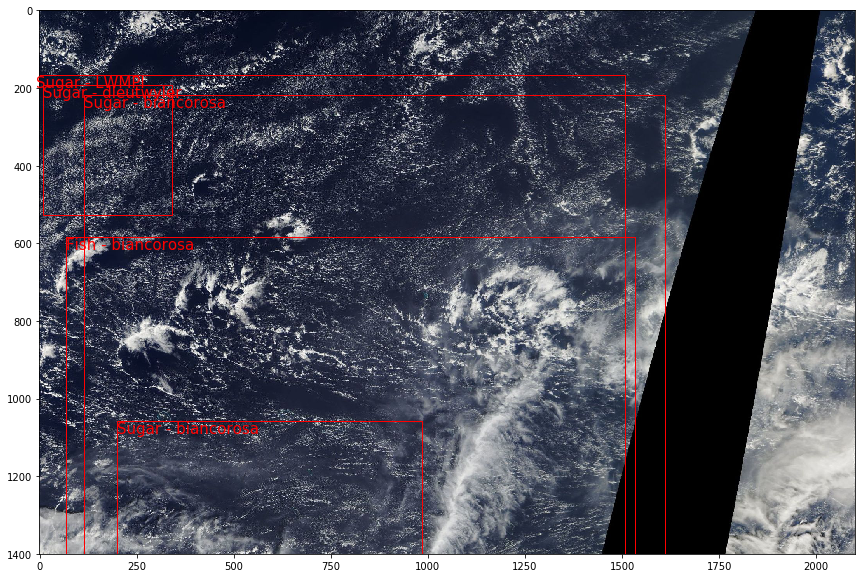

In [275]:
fig, ax = plt.subplots(figsize=(15, 10))
img = Image.open(subj2fn[s])
ax.imshow(img)
for a in annos[s]:
    coords = a[1]
    rect = patches.Rectangle((coords[0],coords[1]), coords[2], coords[2], facecolor='none', edgecolor='r')
    ax.add_patch(rect)
    ax.text(coords[0],coords[1], a[2] + ' - ' + a[0], color='red', fontsize=15, va='top')

In [ ]:
labels = pd.Series([l['tool_label'] for a in clas['annotations'] for l in a['value'] ])

In [205]:
full['annotations'].iloc[0]

{'task': 'T0',
 'task_label': 'Draw bounding boxes around cloud regions',
 'value': [{'x': 437.4206237792969,
   'y': 529.5433959960938,
   'tool': 2,
   'frame': 0,
   'width': 547.6867370605469,
   'height': 427.69879150390625,
   'details': [],
   'tool_label': 'Fish'},
  {'x': 330.979736328125,
   'y': 10.88599967956543,
   'tool': 2,
   'frame': 0,
   'width': 661.8687744140625,
   'height': 508.98094367980957,
   'details': [],
   'tool_label': 'Fish'},
  {'x': 32.94526672363281,
   'y': 7.0154218673706055,
   'tool': 1,
   'frame': 0,
   'width': 298.0344696044922,
   'height': 911.5210161209106,
   'details': [],
   'tool_label': 'Flower'}]}